# Face Detection with Deep Learning(MTCNN)

There are multiple methods for face detection and face landmark localization.
Multi-Task Cascaded Convolutional Neural Network or MTCNN in short is one such method and is based on the paper titled “Joint Face Detection and Alignment Using Multitask Cascaded Convolutional Networks.”
(https://arxiv.org/abs/1604.02878)

The network uses a cascade structure with three networks; first the image is rescaled to a range of different sizes (called an image pyramid), then the first model (Proposal Network or P-Net) proposes candidate facial regions, the second model (Refine Network or R-Net) filters the bounding boxes, and the third model (Output Network or O-Net) proposes facial landmarks

The model is called a multi-task network because each of the three models in the cascade (P-Net, R-Net and O-Net) are trained on three tasks, e.g. make three types of predictions; they are: face classification, bounding box regression, and facial landmark localization.

Open source implementations of the architecture that can be trained on new datasets, as well as pre-trained models that can be used directly for face detection.

### Installations
1. Download and install python : https://www.python.org/downloads/
   Make sure to add python to path

2. Install MTCNN : Open command prompt and use below command 
   <br>pip install mtcnn

3. Tensorflow will be installed along with mtcnn.
   <br>If there are any issues with tensorflow uninstall and reinstall tensorflow
    <br>pip uninstall tensorflow
    <br>pip install tensorflow==2.0

### Description of object returned by model 
Once the model is configured and loaded, it can be used directly to detect faces in photographs.

Model returns a list of dict objects, each providing a number of keys for the details of each face detected, including:
1. 'box' : Providing the x, y of the bottom left of the bounding box, as well as the width and height of the box.
2. ‘confidence‘: The probability confidence of the prediction.
3. ‘keypoints‘: Providing a dict with dots for the ‘left_eye‘, ‘right_eye‘, ‘nose‘, ‘mouth_left‘, and ‘mouth_right‘.
<br>
<br>
<br>

# Sample program for using MTCNN model

In [1]:
# Import required headers
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import copy

Using TensorFlow backend.


In [2]:
# draw an image with detected objects
def draw_boxes(filename, result_list):
    # load the image
	data = plt.imread(filename)
	# plot the image
	plt.imshow(data)
	# get the context for drawing boxes
	ax = plt.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
        # draw the dots on eyes nose ..
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
		plt.axis('off')
    # show the plot
	plt.show()

In [3]:
# draw each face separately
def draw_faces(filename, result_list):
	# load the image
	data1 = plt.imread(filename)
	data = copy.deepcopy(data1)
	ax = plt.gca()
    #Setting up subplots
	faceCount = len(result_list)
	if(faceCount%4 == 0):
	    r = faceCount/4
	else:
	    r = faceCount/4 + 1
	c = 4
	# plot each face as a subplot
	for i in range(faceCount):
		# get coordinates
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# define subplot
		#plt.subplot(1, len(result_list), i+1)
		plt.subplot(r,c,i+1)
		plt.axis('off')
		for key, value in result_list[i]['keypoints'].items():
			if key=='left_eye':
				lx=value[0]
				ly=value[1]
			if(key=='right_eye'):
				rx=value[0]
				ry=value[1]
		data[ly-2:ly+2,lx-2:lx+2,0]=255
		data[ry-2:ry+2,rx-2:rx+2,0]=255
		# plot face
		plt.imshow(data[y1:y2, x1:x2])
	# show the plot
	plt.show()

In [4]:
#Create the detector(load model), using default weights
detector = MTCNN()

In [5]:
#load image from file
filename = "a1.jpeg"
pixels = plt.imread(filename)

In [6]:
#detect faces in the image
faces = detector.detect_faces(pixels)

In [7]:
#Remove false faces
for face in faces:
    confidence = face['confidence']
    if(confidence < 0.9):
        faces.remove(face)

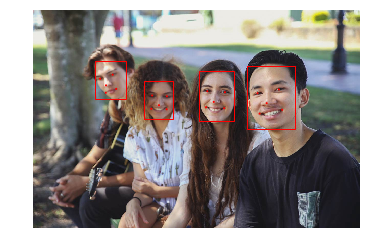

In [8]:
# Draw boxes on faces
draw_boxes(filename, faces)

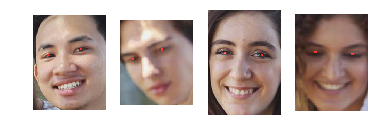

In [9]:
# Remove individual faces
draw_faces(filename, faces)

In [10]:
#load image from file
filename = "a2.jpeg"
pixels = plt.imread(filename)
#detect faces in the image
faces = detector.detect_faces(pixels)
#Remove false faces
for face in faces:
    confidence = face['confidence']
    if(confidence < 0.9):
        faces.remove(face)

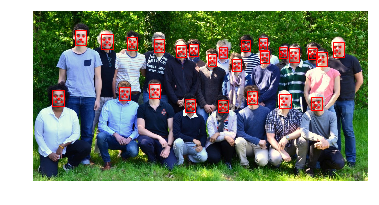

In [11]:
# Draw boxes on faces
draw_boxes(filename, faces)

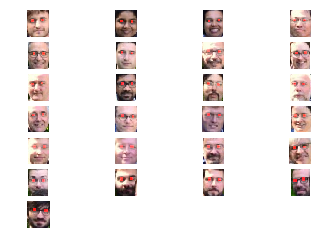

In [12]:
# Remove individual faces
draw_faces(filename, faces)

In [13]:
#load image from file
filename = "a3.jpeg"
pixels = plt.imread(filename)
#detect faces in the image
faces = detector.detect_faces(pixels)
#Remove false faces
for face in faces:
    confidence = face['confidence']
    if(confidence < 0.9):
        faces.remove(face)

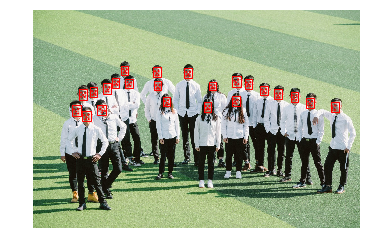

In [14]:
# Draw boxes on faces
draw_boxes(filename, faces)

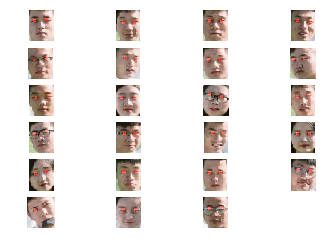

In [15]:
# Remove individual faces
draw_faces(filename, faces)